# 19기 KNN 정규세션 과제

## KNN 구현해보기
### 1. Preprocssing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. KNN 구현 & 파라미터 튜닝
수업 내용 및 실습 자료를 참고하여 KNN을 구현하고 파라미터 튜닝을 하며 결과를 비교해주세요.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [1]:
import pandas as pd
df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


In [2]:
# 어떤 변수인지 천천히 살펴보기
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4.998000e+03,4998.000000,4998.000000,4998.000000,3465.000000,1544.000000,4998.000000
mean,1.003015e+06,8.036815,0.421369,5.320128,9.773737,12.766839,9234.655462
std,1.709910e+03,6.442697,0.493828,3.912281,5.101867,4.023591,4999.225081
min,1.000003e+06,0.000000,0.000000,1.000000,2.000000,3.000000,13.000000
25%,1.001560e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5497.750000
50%,1.003040e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8049.000000
75%,1.004417e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12039.000000
max,1.006037e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23913.000000


In [3]:
# 본 데이터 역시 결측치를 확인하기! 
df.isnull().sum()
df = df.drop(['City_Category','Age'], axis =1 )

In [4]:
df['Product_Category_2'].unique()

array([17., nan,  4.,  5., 15.,  8., 12., 11.,  2., 14.,  3., 18., 16.,
        6., 13., 10.,  9.,  7.])

In [5]:
len(df['Product_Category_2'].unique())

18

# 결측치 imputation 시도하기 

In [6]:
import numpy as np
import pandas as pd

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(pd.DataFrame(df['Product_Category_2']))


df['Product_Category_2'] = imputer.transform(pd.DataFrame(df['Product_Category_2']))


In [8]:
len(df['Product_Category_2'].unique())

17

In [9]:
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Occupation                       0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Product_Category_3            3454
Purchase                         0
dtype: int64

In [10]:
# 결측치가 많은 category 3는 삭제한다 
# 필요 없는 column 제거 

df = df.drop(['Product_Category_3','User_ID','Product_ID'], axis=1)

In [11]:
df.isnull().sum()

Gender                        0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [12]:
# gender 변수를 0,1로 바꿔주기
df.loc[:, 'Gender'] = np.where(df['Gender'] == 'M', 1, 0)

In [13]:
df

,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,10,3,0,5,17.0,2010
1,0,10,1,0,7,8.0,4483
2,0,10,1,0,1,4.0,7696
3,0,10,3,0,2,4.0,16429
4,0,10,3,0,3,5.0,5780
...,...,...,...,...,...,...,...
4993,1,7,1,1,1,16.0,11701
4994,1,1,1,1,8,8.0,2045
4995,1,13,3,1,1,6.0,4505
4996,1,0,2,1,12,8.0,1413


In [14]:
# onehotencoding 을 활용해 binrary 형 

In [15]:
from sklearn.preprocessing import  OneHotEncoder
coding = ['Occupation',   'Product_Category_1','Product_Category_2']

#creating the encoder, fit it to our data 
encoder = OneHotEncoder().fit(df[coding])

In [16]:
#generating feature names for our encoded data
encoder.get_feature_names(coding)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['Occupation_0', 'Occupation_1', 'Occupation_2', 'Occupation_3',
       'Occupation_4', 'Occupation_5', 'Occupation_6', 'Occupation_7',
       'Occupation_8', 'Occupation_9', 'Occupation_10', 'Occupation_11',
       'Occupation_12', 'Occupation_13', 'Occupation_14', 'Occupation_15',
       'Occupation_16', 'Occupation_17', 'Occupation_18', 'Occupation_19',
       'Occupation_20', 'Product_Category_1_1', 'Product_Category_1_2',
       'Product_Category_1_3', 'Product_Category_1_4',
       'Product_Category_1_5', 'Product_Category_1_6',
       'Product_Category_1_7', 'Product_Category_1_8',
       'Product_Category_1_9', 'Product_Category_1_10',
       'Product_Category_1_11', 'Product_Category_1_12',
       'Product_Category_1_13', 'Product_Category_1_14',
       'Product_Category_1_15', 'Product_Category_1_16',
       'Product_Category_1_17', 'Product_Category_1_18',
       'Product_Category_1_19', 'Product_Category_1_20',
       'Product_Category_2_2.0', 'Product_Category_2_3.0'

In [17]:
endcoded_data = pd.DataFrame(encoder.transform(df[coding]).toarray(),index=df.index, columns=encoder.get_feature_names(coding))
endcoded_data.head()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,...,Product_Category_2_9.0,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df = pd.concat([df, endcoded_data],sort=False,axis=1)

df=df.drop(coding, axis=1)

In [19]:
#df = df.drop('City_Category')


In [20]:
df = df.fillna(0)


In [21]:
X = endcoded_data
y = df['Gender']


In [22]:
#X = X.drop('City_Category',axis = 1)
#X = X.drop('Age',axis = 1)

In [23]:
X

,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,...,Product_Category_2_9.0,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4994,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.30)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [27]:
print("Test Score : {:.3f}".format(knn.score(X_test, y_test)))

Test Score : 0.715


In [28]:
results = knn.predict(X_test)
results

array([1, 1, 1, ..., 0, 1, 1])

In [29]:
from sklearn import metrics
print(metrics.classification_report(y_test,results, digits=2))

              precision    recall  f1-score   support

           0       0.33      0.20      0.25       355
           1       0.78      0.87      0.82      1145

    accuracy                           0.71      1500
   macro avg       0.55      0.54      0.54      1500
weighted avg       0.67      0.71      0.69      1500



In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

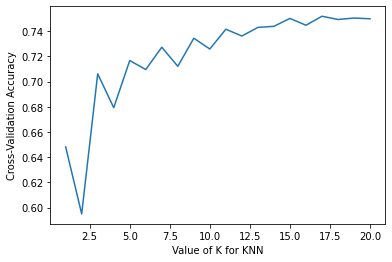

In [33]:
from sklearn.model_selection import cross_val_score
k_range = list(range(1,21))           
k_score = []                        

for k in k_range :
    knn = KNeighborsClassifier(k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring = "accuracy")    # 5-fold cross-validation
    k_score.append(scores.mean())                    

plt.plot(k_range, k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

In [34]:
# 0.75에서 유지하는 현상을 보인다 